In [0]:
dbutils.fs.mkdirs("/US_Healthcare")

Out[1]: True

In [0]:
dbutils.fs.ls("/US_Healthcare/")

Out[2]: []

In [0]:
from pyspark.sql.functions import *

In [0]:
from pyspark.sql.types import *

In [0]:
from pyspark.sql.window import Window

In [0]:
spark.read.format("csv").option("header", True).option("inferSchema", True).load("dbfs:/FileStore/US_Healthcare/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv")

Out[6]: DataFrame[DESYNPUF_ID: string, CLM_ID: bigint, SEGMENT: int, CLM_FROM_DT: int, CLM_THRU_DT: int, PRVDR_NUM: string, CLM_PMT_AMT: double, NCH_PRMRY_PYR_CLM_PD_AMT: double, AT_PHYSN_NPI: bigint, OP_PHYSN_NPI: bigint, OT_PHYSN_NPI: bigint, NCH_BENE_BLOOD_DDCTBL_LBLTY_AM: double, ICD9_DGNS_CD_1: string, ICD9_DGNS_CD_2: string, ICD9_DGNS_CD_3: string, ICD9_DGNS_CD_4: string, ICD9_DGNS_CD_5: string, ICD9_DGNS_CD_6: string, ICD9_DGNS_CD_7: string, ICD9_DGNS_CD_8: string, ICD9_DGNS_CD_9: string, ICD9_DGNS_CD_10: string, ICD9_PRCDR_CD_1: int, ICD9_PRCDR_CD_2: string, ICD9_PRCDR_CD_3: string, ICD9_PRCDR_CD_4: string, ICD9_PRCDR_CD_5: string, ICD9_PRCDR_CD_6: string, NCH_BENE_PTB_DDCTBL_AMT: double, NCH_BENE_PTB_COINSRNC_AMT: double, ADMTNG_ICD9_DGNS_CD: string, HCPCS_CD_1: string, HCPCS_CD_2: string, HCPCS_CD_3: string, HCPCS_CD_4: string, HCPCS_CD_5: string, HCPCS_CD_6: string, HCPCS_CD_7: string, HCPCS_CD_8: string, HCPCS_CD_9: string, HCPCS_CD_10: string, HCPCS_CD_11: string, HCPCS_CD

In [0]:
df = spark.read.format("csv").option("header", True).option("inferSchema", True).load("dbfs:/FileStore/US_Healthcare/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv")

In [0]:
denied_claims_df = df.filter(col("CLM_PMT_AMT") == 0)

In [0]:

limited_df_denied_claims = denied_claims_df.limit(5).display()

DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
00048EF1F4791C68,542302281096061,1,20081018,20081018,4400MM,0.0,0.0,4528452681,null,null,0.0,4019,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,20.0,null,36415,80053,85007,71260,85025,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
00048EF1F4791C68,542232281509421,1,20090511,20090511,4401BJ,0.0,0.0,985868387,null,985868387,0.0,72764,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,36415,80061,80053,77280,85610,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0004F0ABD505251D,542302281055787,1,20091205,20091225,41008M,0.0,0.0,8603670838,null,5882072092,0.0,71893,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,20.0,null,36415,97150,97110,97010,97110,97140,97140,97035,97112,97001,G0283,97140,97530,97140,G0283,G0283,G0283,97012,97110,G0283,97035,G0283,97116,97012,97110,97110,97035,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0007F12A492FD25D,542202281627228,1,20080305,20080305,3401TG,0.0,0.0,6494876540,null,null,0.0,34663,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,70.0,78703,97530,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0007F12A492FD25D,542952281531877,1,20080323,20080323,4225KN,0.0,0.0,4090717408,null,null,0.0,3598,7820,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,70.0,7845,92611,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [0]:
icd_denial_pattern= denied_claims_df.groupBy("ICD9_DGNS_CD_1").count().orderBy("count", ascending=False).show(10)

+--------------+-----+
|ICD9_DGNS_CD_1|count|
+--------------+-----+
|          4011|  700|
|          4019|  690|
|         78659|  125|
|          2723|  124|
|         78650|  123|
|         78651|  112|
|         OTHER|  111|
|          2724|  110|
|          2721|  103|
|          2720|  101|
+--------------+-----+
only showing top 10 rows



In [0]:
hcpcs_denial_pattaern = denied_claims_df.groupBy("HCPCS_CD_1").count().orderBy("count", ascending=False).show(10)

+----------+-----+
|HCPCS_CD_1|count|
+----------+-----+
|      null| 5867|
|     36415| 5308|
|     99213| 1268|
|     99212| 1052|
|     80053|  835|
|     97110|  673|
|     99214|  548|
|     71020|  544|
|     80048|  543|
|     99211|  481|
+----------+-----+
only showing top 10 rows



+-------+-----------------+
|summary|      CLM_PMT_AMT|
+-------+-----------------+
|  count|           790790|
|   mean|283.9245691017843|
| stddev|571.3927944312754|
|    min|           -100.0|
|    25%|             40.0|
|    50%|             80.0|
|    75%|            200.0|
|    max|           3300.0|
+-------+-----------------+



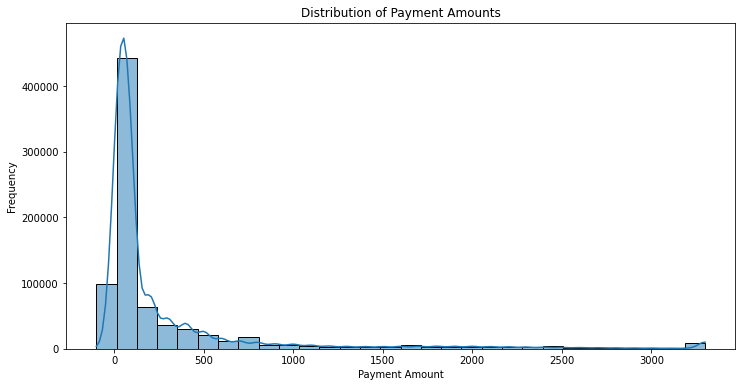

In [0]:
# Calculate summary statistics for payment amounts
payment_summary = df.select("CLM_PMT_AMT").summary("count", "mean", "stddev", "min", "25%", "50%", "75%", "max")

# Display the summary statistics
payment_summary.show()

# Visualize the distribution of payment amounts
import matplotlib.pyplot as plt
import seaborn as sns

payment_amounts = df.select("CLM_PMT_AMT").toPandas()
plt.figure(figsize=(12, 6))
sns.histplot(payment_amounts["CLM_PMT_AMT"], bins=30, kde=True)
plt.title("Distribution of Payment Amounts")
plt.xlabel("Payment Amount")
plt.ylabel("Frequency")
plt.show()



In [0]:

# Filter the DataFrame for negative payment amounts
negative_pmts_df = df.filter(col("CLM_PMT_AMT")<0)

In [0]:
# negative_pmts_df.display()

# Calculate summary statistics for the negative payment amounts
negative_pmts_summary = negative_pmts_df.select("CLM_PMT_AMT").summary("count", "mean", "stddev", "min", "25%", "50%", "75%", "max")

# Display the summary statistics
negative_pmts_summary.show()

+-------+-------------------+
|summary|        CLM_PMT_AMT|
+-------+-------------------+
|  count|               2566|
|   mean|-31.336710833982853|
| stddev|  21.09955129960387|
|    min|             -100.0|
|    25%|              -50.0|
|    50%|              -30.0|
|    75%|              -10.0|
|    max|              -10.0|
+-------+-------------------+



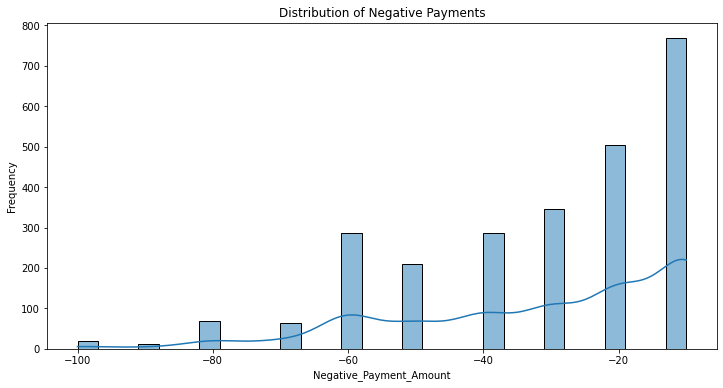

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns


negative_pmt_amt = negative_pmts_df.select("CLM_PMT_AMT").toPandas()

plt.figure(figsize=(12,6))

sns.histplot(negative_pmt_amt["CLM_PMT_AMT"], bins=30, kde = True)

plt.title("Distribution of Negative Payments")

plt.xlabel("Negative_Payment_Amount")

plt.ylabel("Frequency")

plt.show()

In [0]:
# df.groupBy("HCPCS_CD_1").count().orderBy("count", ascending=False)

procedure_count_df = df.groupBy("HCPCS_CD_1").count().orderBy("count", ascending = False)


In [0]:
procedure_count_df.show()

+----------+------+
|HCPCS_CD_1| count|
+----------+------+
|     36415|161373|
|      null|144530|
|     99213| 31792|
|     99212| 23658|
|     80053| 22883|
|     A4657| 20237|
|     85610| 19812|
|     97110| 18410|
|     99214| 14890|
|     80048| 13866|
|     G0202| 13462|
|     71020| 12244|
|     99211| 11512|
|     G0283|  5701|
|     97001|  5484|
|     77080|  5414|
|     87086|  5400|
|     90658|  5300|
|     88305|  5085|
|     A0425|  4865|
+----------+------+
only showing top 20 rows



In [0]:
    top_procedure_pmt = procedure_count_df.limit(10).toPandas() 
    # Limit to top 10 for better visualization

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns

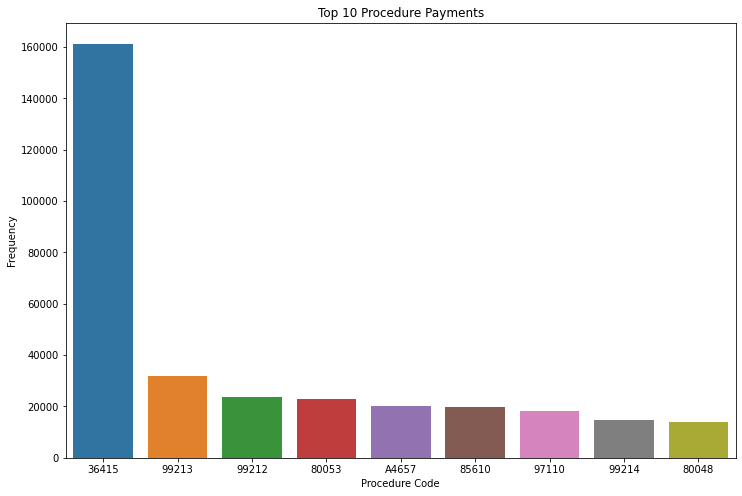

In [0]:
plt.figure(figsize=(12,8))
sns.barplot(x= "HCPCS_CD_1", y= "count", data= top_procedure_pmt)
plt.title("Top 10 Procedure Payments")
plt.xlabel("Procedure Code")
plt.ylabel("Frequency")
plt.show()

In [0]:
diagnosis_counts_df = df.groupBy("ICD9_DGNS_CD_1").count().orderBy("count", ascending = False)
# Count the frequency of each diagnosis code

In [0]:
top_diagnosis_pmt = diagnosis_counts_df.limit(10).toPandas()
# Limit to top 10 for better visualization

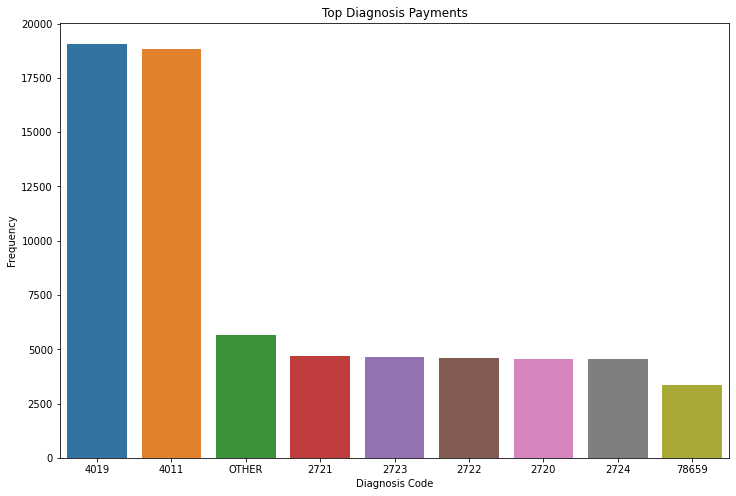

In [0]:
plt.figure(figsize=(12,8))
sns.barplot(x= "ICD9_DGNS_CD_1", y= "count", data= top_diagnosis_pmt)
plt.title("Top Diagnosis Payments")
plt.xlabel("Diagnosis Code")
plt.ylabel("Frequency")
plt.show()

In [0]:
# Aggregate payment amounts by diagnosis code
diagnosis_payment_totals = df.groupBy("ICD9_DGNS_CD_1").sum("CLM_PMT_AMT")\
                            .withColumnRenamed("sum(CLM_PMT_AMT)", "TOTAL_PAYMENT")\
                            .orderBy("TOTAL_PAYMENT", ascending= False).limit(10).display()

ICD9_DGNS_CD_1,TOTAL_PAYMENT
OTHER,7748400.0
null,7498650.0
V562,2215270.0
V560,2144310.0
7925,2125980.0
V5631,2122630.0
5855,2117530.0
V568,2113200.0
5856,2106320.0
5859,2101030.0


Databricks visualization. Run in Databricks to view.

In [0]:
# Aggregate payment amounts by procedure code
procedure_payment_totals = df.groupBy("HCPCS_CD_1").sum("CLM_PMT_AMT")\
                            .withColumnRenamed("sum(CLM_PMT_AMT)", "TOTAL_PAYMENT")\
                            .orderBy(col("TOTAL_PAYMENT").desc())

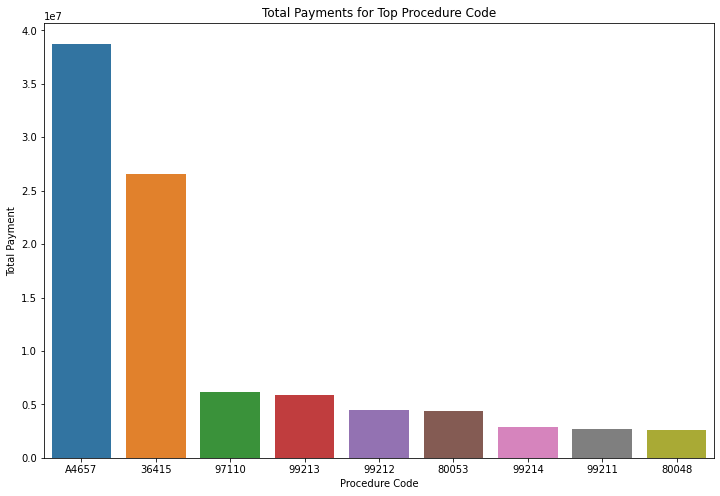

In [0]:
# Create a bar plot visualization for top payments by procedure code

top_procedure_pmt_amt = procedure_payment_totals.orderBy("TOTAL_PAYMENT", ascending= False).limit(10).toPandas()

plt.figure(figsize=(12,8))
sns.barplot(x= "HCPCS_CD_1", y= "TOTAL_PAYMENT", data= top_procedure_pmt_amt)
plt.title("Total Payments for Top Procedure Code")
plt.xlabel("Procedure Code")
plt.ylabel("Total Payment")
plt.show()

In [0]:
df.filter(col("CLM_PMT_AMT") == 0)

Out[122]: DataFrame[DESYNPUF_ID: string, CLM_ID: bigint, SEGMENT: int, CLM_FROM_DT: int, CLM_THRU_DT: int, PRVDR_NUM: string, CLM_PMT_AMT: double, NCH_PRMRY_PYR_CLM_PD_AMT: double, AT_PHYSN_NPI: bigint, OP_PHYSN_NPI: bigint, OT_PHYSN_NPI: bigint, NCH_BENE_BLOOD_DDCTBL_LBLTY_AM: double, ICD9_DGNS_CD_1: string, ICD9_DGNS_CD_2: string, ICD9_DGNS_CD_3: string, ICD9_DGNS_CD_4: string, ICD9_DGNS_CD_5: string, ICD9_DGNS_CD_6: string, ICD9_DGNS_CD_7: string, ICD9_DGNS_CD_8: string, ICD9_DGNS_CD_9: string, ICD9_DGNS_CD_10: string, ICD9_PRCDR_CD_1: int, ICD9_PRCDR_CD_2: string, ICD9_PRCDR_CD_3: string, ICD9_PRCDR_CD_4: string, ICD9_PRCDR_CD_5: string, ICD9_PRCDR_CD_6: string, NCH_BENE_PTB_DDCTBL_AMT: double, NCH_BENE_PTB_COINSRNC_AMT: double, ADMTNG_ICD9_DGNS_CD: string, HCPCS_CD_1: string, HCPCS_CD_2: string, HCPCS_CD_3: string, HCPCS_CD_4: string, HCPCS_CD_5: string, HCPCS_CD_6: string, HCPCS_CD_7: string, HCPCS_CD_8: string, HCPCS_CD_9: string, HCPCS_CD_10: string, HCPCS_CD_11: string, HCPCS_

In [0]:
df.createOrReplaceTempView("CLAIMS")

In [0]:
denied_claims_df.createOrReplaceTempView("DENIED_CLAIMS")

In [0]:
spark.sql("SELECT HCPCS_CD_1, ICD9_DGNS_CD_1,\
        COUNT(*) AS ZERO_PAYMENT_COUNT\
        FROM DENIED_CLAIMS\
        GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1\
        ORDER BY ZERO_PAYMENT_COUNT DESC")


limited_df_cpt_dx_claims_denied= spark.sql("SELECT HCPCS_CD_1, ICD9_DGNS_CD_1,\
        COUNT(*) AS ZERO_PAYMENT_COUNT\
        FROM DENIED_CLAIMS\
        GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1\
        ORDER BY ZERO_PAYMENT_COUNT DESC").limit(5).display()

HCPCS_CD_1,ICD9_DGNS_CD_1,ZERO_PAYMENT_COUNT
36415,4019,233
36415,4011,211
null,4011,89
null,4019,86
99213,4011,70


In [0]:
spark.sql("SELECT HCPCS_CD_1, ICD9_DGNS_CD_1,\
        COUNT(*) AS TOTAL_CLAIMS\
        FROM CLAIMS\
        GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1\
        ORDER BY TOTAL_CLAIMS DESC")


limited_df_cpt_dx_claims= spark.sql("SELECT HCPCS_CD_1, ICD9_DGNS_CD_1,\
        COUNT(*) AS TOTAL_CLAIMS\
        FROM CLAIMS\
        GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1\
        ORDER BY TOTAL_CLAIMS DESC").limit(5).display()

HCPCS_CD_1,ICD9_DGNS_CD_1,TOTAL_CLAIMS
36415,4019,6343
36415,4011,6288
A4657,null,2680
A4657,OTHER,2670
36415,2721,2653


In [0]:
resultDF = spark.sql("""
SELECT 
    TOTAL.HCPCS_CD_1, 
    TOTAL.ICD9_DGNS_CD_1,
    TOTAL.TOTAL_CLAIMS,
    COALESCE(DENIED.ZERO_PAYMENT_COUNT, 0) AS ZERO_PAYMENT_COUNT,
    ROUND((COALESCE(DENIED.ZERO_PAYMENT_COUNT, 0)/TOTAL.TOTAL_CLAIMS) * 100, 2) AS DENIAL_PERCENTAGE,
    ROUND(((TOTAL.TOTAL_CLAIMS - COALESCE(DENIED.ZERO_PAYMENT_COUNT, 0)) / TOTAL.TOTAL_CLAIMS) * 100, 2) AS PAYMENT_PERCENTAGE
FROM 
    (SELECT 
        HCPCS_CD_1, 
        ICD9_DGNS_CD_1,
        COUNT(*) AS ZERO_PAYMENT_COUNT
     FROM DENIED_CLAIMS
     GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1
    ) DENIED
LEFT JOIN
    (SELECT 
        HCPCS_CD_1,
        ICD9_DGNS_CD_1,
        COUNT(*) AS TOTAL_CLAIMS
     FROM CLAIMS
     GROUP BY HCPCS_CD_1, ICD9_DGNS_CD_1
    ) TOTAL
ON TOTAL.HCPCS_CD_1 = DENIED.HCPCS_CD_1
AND TOTAL.ICD9_DGNS_CD_1 = DENIED.ICD9_DGNS_CD_1
""") 


In [0]:
#Step 1: Dataframe converted to Pandas to be used for visualization.  Order by Total Claims and Limit to Top 20
Procedure_Diag_Pmt_Dnl_Analysis = resultDF.orderBy("TOTAL_CLAIMS", ascending = False).limit(20).toPandas()

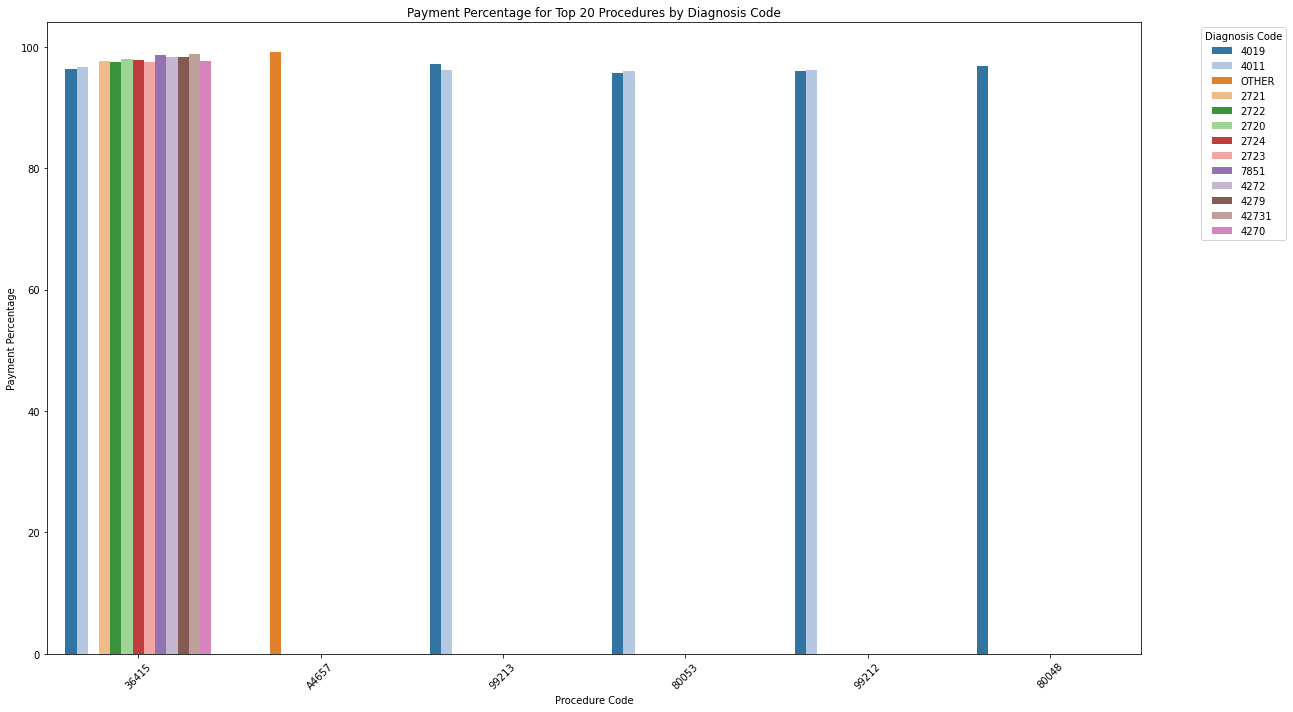

In [0]:
# This Plot shows payment percentage of procedure code billed with each diagnosis code

# Plot the Data
import matplotlib.pyplot as plt
import seaborn as sns


# Set the figure size for better visibility
plt.figure(figsize=(18, 10))  # Increase the width of the figure

# Adjust the width of the bars
bar_width = 0.8  # You can adjust this value to make the bars wider or narrower

# Create a bar plot with procedure codes on the x-axis, payment percentage on the y-axis, and hue based on diagnosis codes
sns.barplot(data=Procedure_Diag_Pmt_Dnl_Analysis, x='HCPCS_CD_1', y='PAYMENT_PERCENTAGE', hue='ICD9_DGNS_CD_1', palette='tab20', dodge=True)

# Add a title to the plot
plt.title('Payment Percentage for Top 20 Procedures by Diagnosis Code')

# Label the x-axis
plt.xlabel('Procedure Code')

# Label the y-axis
plt.ylabel('Payment Percentage')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Move the legend to the right side of the plot
plt.legend(title='Diagnosis Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent clipping of the plot
plt.tight_layout()

# Display the plot
plt.show()


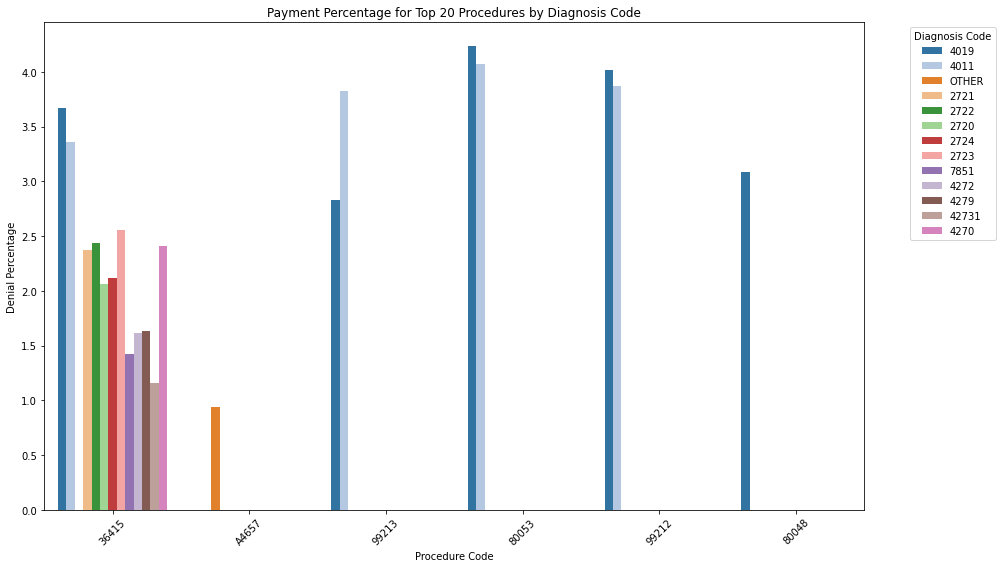

In [0]:
# This Plot shows denial percentage of procedure code billed with each diagnosis code

# Plot the Data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(14, 8))

# Create a bar plot with procedure codes on the x-axis, payment percentage on the y-axis, and hue based on diagnosis codes
sns.barplot(data=Procedure_Diag_Pmt_Dnl_Analysis, x='HCPCS_CD_1', y='DENIAL_PERCENTAGE', hue='ICD9_DGNS_CD_1', palette='tab20', dodge=True)

# Add a title to the plot
plt.title('Payment Percentage for Top 20 Procedures by Diagnosis Code')

# Label the x-axis
plt.xlabel('Procedure Code')

# Label the y-axis
plt.ylabel('Denial Percentage')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to the plot, with the title indicating that it shows diagnosis codes
plt.legend(title='Diagnosis Code')

# Move the legend to the right side of the plot
plt.legend(title='Diagnosis Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent clipping of the plot
plt.tight_layout()

# Display the plot
plt.show()


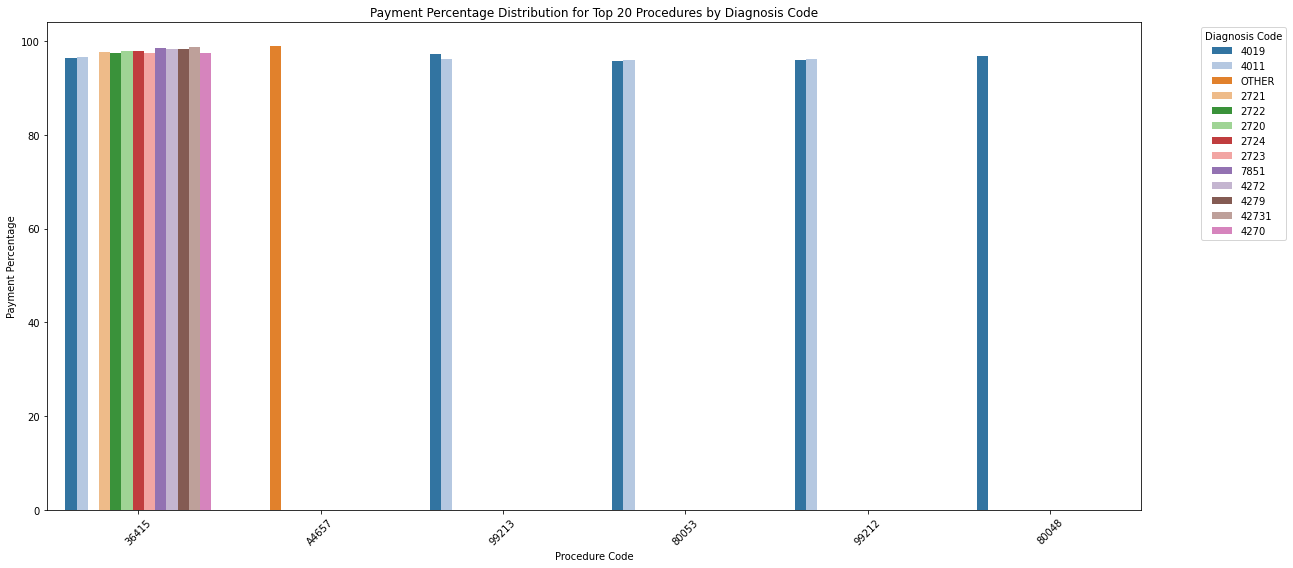

In [0]:
# Set the figure size for better visibility
plt.figure(figsize=(18, 8))

# Create a stacked bar plot with procedure codes on the x-axis, payment percentage on the y-axis, and hue based on diagnosis codes
sns.barplot(data=Procedure_Diag_Pmt_Dnl_Analysis, x='HCPCS_CD_1', y='PAYMENT_PERCENTAGE', hue='ICD9_DGNS_CD_1', palette='tab20')

# Add a title to the plot
plt.title('Payment Percentage Distribution for Top 20 Procedures by Diagnosis Code')

# Label the x-axis
plt.xlabel('Procedure Code')

# Label the y-axis
plt.ylabel('Payment Percentage')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Move the legend to the right side of the plot
plt.legend(title='Diagnosis Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent clipping of the plot
plt.tight_layout()

# Display the plot
plt.show()
